# UV map
- nii to vtk
    - nii2mesh
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html

# TODO
- Smoothing된 rendering 도입


# Common Libraries

In [1]:
import os
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go
import nibabel as nb
from glob import glob

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")
sys.path.append("/home/seojin/Seojin_commonTool/Module/Brain_Surface/")

from plot_3d import draw_uv_map, show_non_interactive_mesh
from brain_mesh import show_stat_onUV, load_mesh
from sj_image_process import find_connected_components_faces
from sj_array import map_indicies
from surface_analysis import surface_profile_onUV

# Constants

In [3]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask"
lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus.obj")
lt_hippo_uv_path = os.path.join(mask_dir_path, "lt_hippocampus_afterUVmap_planarZ.obj")

# Load Data

In [4]:
# Vertex & Faces
lt_hippo_mesh_info = load_mesh(lt_hippo_path)
lt_hippo_uv_mesh_info = load_mesh(lt_hippo_uv_path, type_ = "uv")

# Data
data_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/Group/rsa/rdm/set/WholeSet/base_seqOnly/None/pattern_separation"
data_paths = sorted(glob(os.path.join(data_dir_path, "WholeSet_HP*")))


# Orientation

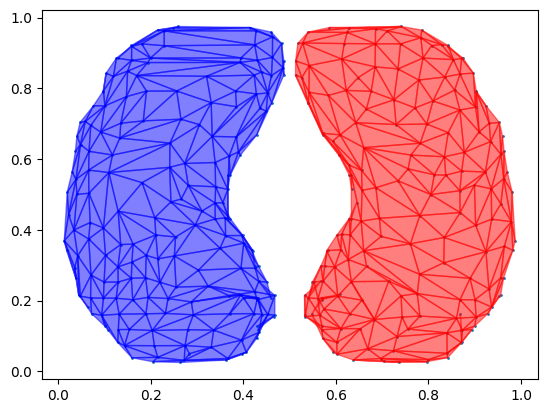

In [5]:
first_components = find_connected_components_faces(faces = lt_hippo_uv_mesh_info["face"])[0]
second_components = find_connected_components_faces(faces = lt_hippo_uv_mesh_info["face"])[1]
highlight_face_info = {
    "first" : {
        "data" : first_components,
        "color" : "red",
    },
    "second" : {
        "data" : second_components,
        "color" : "blue",
    },
}
draw_uv_map(lt_hippo_uv_mesh_info["uv"], lt_hippo_uv_mesh_info["face"], highlight_face_info = highlight_face_info)

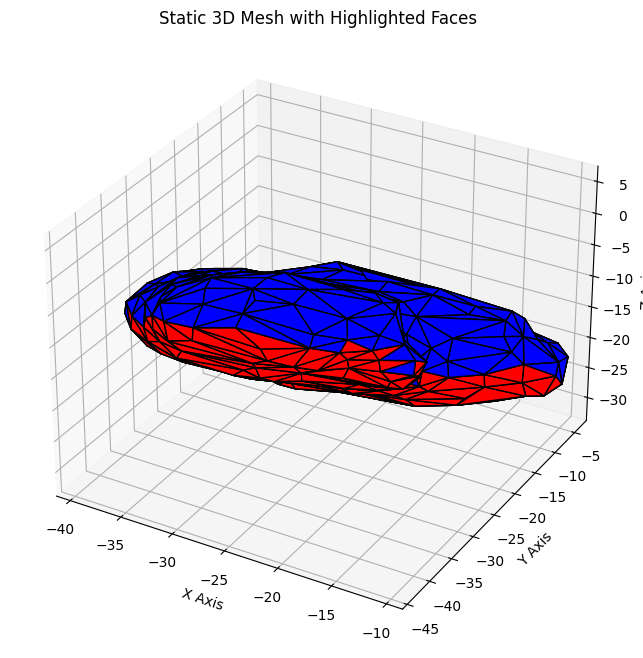

In [6]:
fig, ax = show_non_interactive_mesh(lt_hippo_mesh_info["vertex"], 
                                    lt_hippo_mesh_info["face"], 
                                    highlight_face_info = highlight_face_info)
fig.set_figwidth(10)
fig.set_figheight(15)
ax.set_xlabel("R+")
ax.set_ylabel("A+")
ax.set_zlabel("S+")
fig.tight_layout()
plt.show()

# Functions

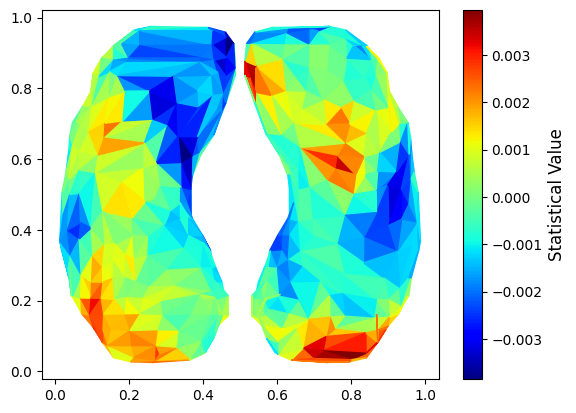

In [7]:
fig, axis = show_stat_onUV(vertices = lt_hippo_uv_mesh_info["vertex"], 
                           uv_coordinates = lt_hippo_uv_mesh_info["uv"],
                           faces = lt_hippo_uv_mesh_info["face"],
                           stat_path = data_paths[0])


# Remain superior only

In [162]:
superior_vertices = np.unique(lt_hippo_uv_mesh_info["face"][second_components].reshape(-1))

# Vertex index mapping
mapping = map_indicies(original_indices = np.arange(len(lt_hippo_uv_mesh_info["vertex"])), 
                       including_indices = superior_vertices)
inverse_mapping = {v: k for k, v in mapping.items()}
del inverse_mapping[-1]

# Change face based on vertex mapping
vectorized_function = np.vectorize(mapping.get)
coverted_faces = vectorized_function(lt_hippo_uv_mesh_info["face"])
coverted_faces = coverted_faces[np.alltrue(coverted_faces != -1, axis = 1)]

# Subset verticies
is_subset_vertices = np.array(list(mapping.values())) != -1
subset_vertices = lt_hippo_uv_mesh_info["vertex"][is_subset_vertices]
subset_uv_vertices = lt_hippo_uv_mesh_info["uv"][is_subset_vertices]


In [163]:
# Converted faces
# non converted faces

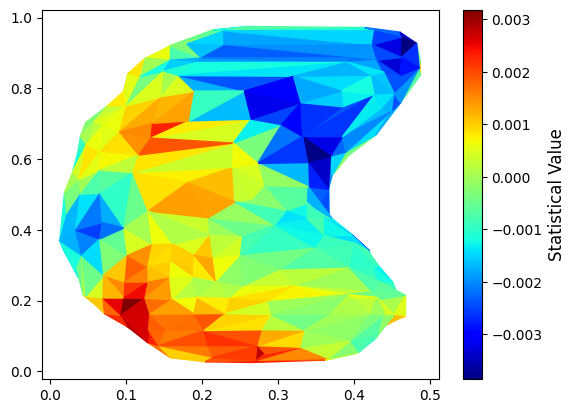

In [164]:
fig, axis = show_stat_onUV(vertices = subset_vertices, 
                           uv_coordinates = subset_uv_vertices,
                           faces = coverted_faces,
                           stat_path = data_paths[0])

# Coverage

In [165]:
result_info = surface_profile_onUV(data_paths = data_paths, 
                                    vertices = converted_vertices,
                                    uv_coordinates = converted_uv_vertices, 
                                    from_point = np.array([0.25, 0]), 
                                    to_point = np.array([0.25, 1]), 
                                    n_sampling = 10, 
                                    width = 1)

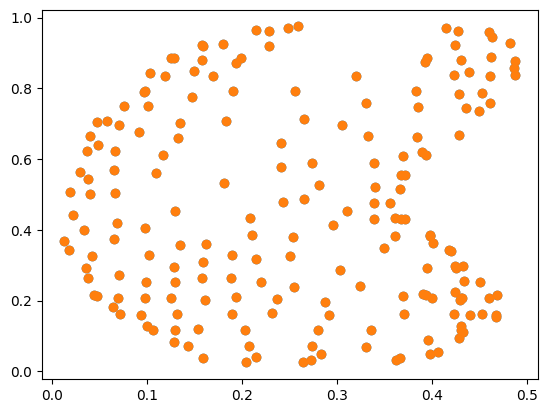

In [166]:
a = converted_uv_vertices[result_info["virtual_strip_mask"]]

plt.scatter(converted_uv_vertices[:, 0], converted_uv_vertices[:, 1])
plt.scatter(a[:, 0], a[:, 1])

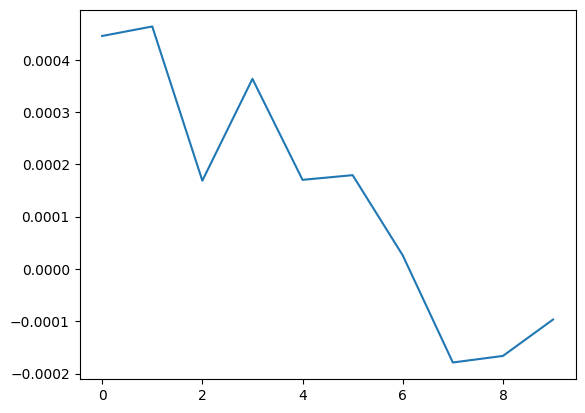

In [167]:
plt.plot(np.mean(result_info["sampling_datas"], axis = 0))